In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.rc('text', usetex=True)

In [2]:
measure = 'AP'

# Read Noise2Seg Results

In [3]:
def get_measure(pre, exp, run=1, fraction=0.5, measure='SEG', score_type='validation_'):
    path = '/home/tibuch/Noise2Seg/experiments/{}_{}_run{}/fraction_{}/{}scores.csv'.format(pre, exp, run, fraction, score_type)
    try:
        with open(path) as f:
            line = f.readline()
            while line:
                line = line.strip().split(',')
                if line[0] == measure:
                    return float(line[1])
                line = f.readline()
    except: 
        print("Missing:", path)
        return None
    return None

In [4]:
def read_Noise2Seg_results(pre, exp, measure='SEG', runs=[1,2,3,4,5], 
                           fractions=[0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 100.0], score_type='validation_'):
    
    stats = []
    
    for frac in fractions:
        scores = []
        for r in runs:
            res = get_measure(pre, exp, run=r, fraction=frac, measure=measure, score_type=score_type)
            if res:
                scores.append(res)
        
        scores = np.array(scores)
        stats.append([frac, np.mean(scores), np.std(scores)/np.sqrt(scores.shape[0])])
    
    return np.array(stats)

# Fraction to #Images

In [5]:
def fraction_to_abs(fracs, max_num_imgs=3800):
    return np.round(max_num_imgs*fracs/100)

In [6]:
fraction_to_abs(8)

304.0

# DSB2018 n10: SEG scores on validation data

In [7]:
joint_alpha0_5_dsb_n10 = read_Noise2Seg_results('alpha0.5', 'dsb_n10', measure=measure, runs=[1,2,3,4,5], 
                           fractions=[0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 100.0])

dsb_n10_valSegLossMonitor = read_Noise2Seg_results('alpha0.5', 'dsb_n10_segloss', measure=measure, runs=[1,2,3,4,5], 
                           fractions=[0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 100.0])

Missing: /home/tibuch/Noise2Seg/experiments/alpha0.5_dsb_n10_segloss_run3/fraction_2.0/validation_scores.csv
Missing: /home/tibuch/Noise2Seg/experiments/alpha0.5_dsb_n10_segloss_run3/fraction_4.0/validation_scores.csv


In [8]:
baseline_dsb_n10 = read_Noise2Seg_results('fin', 'dsb_n10', measure=measure, runs=[1,2,3,4,5], 
                           fractions=[0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 100.0])

sequential_dsb_n10 = read_Noise2Seg_results('finSeq', 'dsb_n10', measure=measure, runs=[1,2,3,4,5], 
                           fractions=[0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 100.0])

In [9]:
def cm2inch(*tupl, scale=3):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(scale * i/inch for i in tupl[0])
    else:
        return tuple(scale * i/inch for i in tupl)

In [10]:
plt.rc('font', family = 'serif', size = 20)

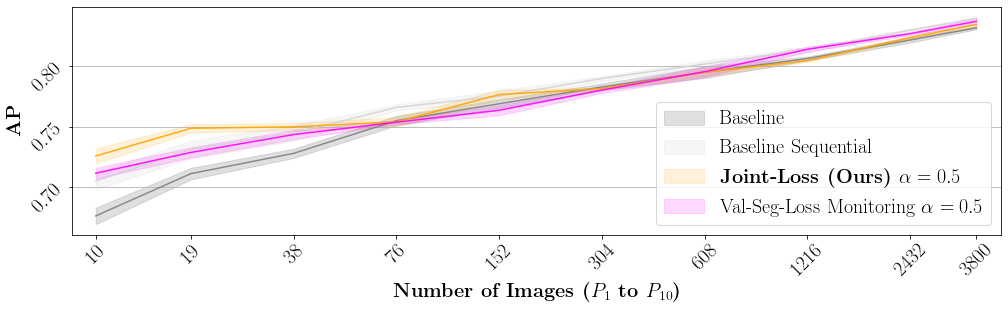

In [11]:
fig = plt.figure(figsize=cm2inch(12.2,4)) # 12.2cm is the text-widht of the MICCAI template

plt.plot(fraction_to_abs(baseline_dsb_n10[:, 0], max_num_imgs = 3800), 
         baseline_dsb_n10[:, 1],
         color = 'gray', alpha = 0.9)
plt.fill_between(fraction_to_abs(baseline_dsb_n10[:, 0], max_num_imgs = 3800), 
                 y1 = baseline_dsb_n10[:, 1] + baseline_dsb_n10[:, 2], 
                 y2 = baseline_dsb_n10[:, 1] - baseline_dsb_n10[:, 2], 
                 color = 'gray', alpha = 0.25, label = 'Baseline')

plt.plot(fraction_to_abs(sequential_dsb_n10[:, 0], max_num_imgs = 3800), 
         sequential_dsb_n10[:, 1],
         color = 'lightgray', alpha = 0.9)
plt.fill_between(fraction_to_abs(sequential_dsb_n10[:, 0], max_num_imgs = 3800), 
                 y1 = sequential_dsb_n10[:, 1] + sequential_dsb_n10[:, 2], 
                 y2 = sequential_dsb_n10[:, 1] - sequential_dsb_n10[:, 2], 
                 color = 'lightgray', alpha = 0.2, label = 'Baseline Sequential')

plt.plot(fraction_to_abs(joint_alpha0_5_dsb_n10[:, 0], max_num_imgs = 3800), 
         joint_alpha0_5_dsb_n10[:, 1],
         color = 'orange', alpha = 0.9)
plt.fill_between(fraction_to_abs(joint_alpha0_5_dsb_n10[:, 0], max_num_imgs = 3800), 
                 y1 = joint_alpha0_5_dsb_n10[:, 1] + joint_alpha0_5_dsb_n10[:, 2], 
                 y2 = joint_alpha0_5_dsb_n10[:, 1] - joint_alpha0_5_dsb_n10[:, 2], 
                 color = 'orange', alpha = 0.15, label = r'\textbf{Joint-Loss (Ours) $\alpha=0.5$}')

plt.plot(fraction_to_abs(dsb_n10_valSegLossMonitor[:, 0], max_num_imgs = 3800), 
         dsb_n10_valSegLossMonitor[:, 1],
         color = 'magenta', alpha = 0.9)
plt.fill_between(fraction_to_abs(dsb_n10_valSegLossMonitor[:, 0], max_num_imgs = 3800), 
                 y1 = dsb_n10_valSegLossMonitor[:, 1] + dsb_n10_valSegLossMonitor[:, 2], 
                 y2 = dsb_n10_valSegLossMonitor[:, 1] - dsb_n10_valSegLossMonitor[:, 2], 
                 color = 'magenta', alpha = 0.15, label = r'Val-Seg-Loss Monitoring $\alpha=0.5$')

plt.semilogx()
plt.legend(loc = 'lower right')

plt.ylabel(r'\textbf{'+measure+'}')
plt.xlabel(r'\textbf{Number of Images ($P_1$ to $P_{10}$)}')

plt.grid(axis='y')

plt.xticks(ticks=fraction_to_abs(joint_alpha0_5_dsb_n10[:, 0], max_num_imgs = 3800), 
           labels=fraction_to_abs(joint_alpha0_5_dsb_n10[:, 0], max_num_imgs = 3800).astype(np.int),
           rotation=45)
plt.minorticks_off()

plt.yticks(rotation=45)

plt.xlim([8.5, 4500])

plt.tight_layout();